## <font style = "color:rgb(139,0,0)">ENSEMBLE TECHNIQUES PROJECT</font>

### <font style = "color:rgb(139,0,0)">Data Description & Context</font>

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by
decreased dopamine levels in the brain. It manifests itself through a deterioration
of movement, including the presence of tremors and stiffness. There is commonly
a marked effect on speech, including dysarthria (difficulty articulating sounds),
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally,
cognitive impairments and changes in mood can occur, and risk of dementia is
increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a
neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe.
Monitoring progression of the disease over time requires repeated clinic visits by
the patient. An effective screening process, particularly one that doesn’t require a
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician.

### <font style = "color:rgb(139,0,0)">Domain</font>

Medicine

### <font style = "color:rgb(139,0,0)">Attribute Information</font>

- **`name`** - ASCII subject name and recording number
- **`MDVP:Fo(Hz)`** - Average vocal fundamental frequency
- **`MDVP:Fhi(Hz)`** - Maximum vocal fundamental frequency
- **`MDVP:Flo(Hz)`** - Minimum vocal fundamental frequency
- **`MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP`** - Several measures of variation in fundamental frequency
- **`MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA`** - - Several measures of variation in amplitude
- **`NHR,HNR`** - Two measures of ratio of noise to tonal components in the voice
- **`status`** - - Health status of the subject (one) - Parkinson's, (zero) - healthy
- **`RPDE,D2`** - Two nonlinear dynamical complexity measures
- **`DFA`** - Signal fractal scaling exponent
- **`CD Account`** - Does the customer have a certificate of deposit (CD)
- **`spread1,spread2,PPE`** - Three nonlinear measures of fundamental frequency variation
 
### <font style = "color:rgb(139,0,0)">Learning Outcomes</font>
- **`Exploratory Data Analysis`** 
- **`Supervised Learning`** 
- **`Ensemble Learning`** 

### <font style = "color:rgb(139,0,0)">Objective</font>
- **`Goal is to classify the patients into the respective labels using the attributes from their voice recordings.`**

### <font style = "color:rgb(139,0,0)">Steps and tasks :</font>
1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in
terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)
3. Using univariate & bivariate analysis to check the individual attributes for
their basic statistics such as central values, spread, tails, relationships
between variables etc. mention your observations (15 points)
4. Split the dataset into training and test set in the ratio of 70:30
(Training:Test) (5 points)
5. Prepare the data for training - Scale the data if necessary, get rid of missing
values (if any) etc (5 points)
6. Train at least 3 standard classification algorithms - Logistic Regression,
Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test
data (10 points)
7. Train a meta-classifier and note the accuracy on test data (10 points)
8. Train at least one standard Ensemble model - Random forest, Bagging,
Boosting etc, and note the accuracy (10 points)
9. Compare all the models (minimum 5) and pick the best one among them
(10 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

In [3]:
# suppressing warnings.
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [4]:
parkinsons = pd.read_csv("Parkinsons.csv")

## It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [5]:
parkinsons.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [6]:
parkinsons.shape

(195, 24)

In [7]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Dataset has no null values and consists of 195 rows abd 24 columns.

In [8]:
parkinsons.describe(include ="all").T

count unique             top freq        mean        std  \
name                195    195  phon_R01_S27_3    1         NaN        NaN   
MDVP:Fo(Hz)       195.0    NaN             NaN  NaN  154.228641  41.390065   
MDVP:Fhi(Hz)      195.0    NaN             NaN  NaN  197.104918  91.491548   
MDVP:Flo(Hz)      195.0    NaN             NaN  NaN  116.324631  43.521413   
MDVP:Jitter(%)    195.0    NaN             NaN  NaN     0.00622   0.004848   
MDVP:Jitter(Abs)  195.0    NaN             NaN  NaN    0.000044   0.000035   
MDVP:RAP          195.0    NaN             NaN  NaN    0.003306   0.002968   
MDVP:PPQ          195.0    NaN             NaN  NaN    0.003446   0.002759   
Jitter:DDP        195.0    NaN             NaN  NaN     0.00992   0.008903   
MDVP:Shimmer      195.0    NaN             NaN  NaN    0.029709   0.018857   
MDVP:Shimmer(dB)  195.0    NaN             NaN  NaN    0.282251   0.194877   
Shimmer:APQ3      195.0    NaN             NaN  NaN    0.015664   0.010153   
Shimmer:APQ5      195.0    NaN             NaN  NaN    0.017878   0.012024   
MDVP:APQ          195.0    NaN             NaN  NaN    0.024081   0.016947   
Shimmer:DDA       195.0    NaN             NaN  NaN    0.046993   0.030459   
NHR               195.0    NaN             NaN  NaN    0.024847   0.040418   
HNR               195.0    NaN             NaN  NaN   21.885974   4.425764   
status            195.0    NaN             NaN  NaN    0.753846   0.431878   
RPDE              195.0    NaN             NaN  NaN    0.498536   0.103942   
DFA               195.0    NaN             NaN  NaN    0.718099   0.055336   
spread1           195.0    NaN             NaN  NaN   -5.684397   1.090208   
spread2           195.0    NaN             NaN  NaN     0.22651   0.083406   
D2                195.0    NaN             NaN  NaN    2.381826   0.382799   
PPE               195.0    NaN             NaN  NaN    0.206552   0.090119   

                       min       25%       50%       75%       max  
name                   NaN       NaN       NaN       NaN       NaN  
MDVP:Fo(Hz)         88.333   117.572    148.79   182.769   260.105  
MDVP:Fhi(Hz)       102.145  134.8625   175.829  224.2055    592.03  
MDVP:Flo(Hz)        65.476    84.291   104.315  140.0185    239.17  
MDVP:Jitter(%)     0.00168   0.00346   0.00494  0.007365   0.03316  
MDVP:Jitter(Abs)  0.000007   0.00002   0.00003   0.00006   0.00026  
MDVP:RAP           0.00068   0.00166    0.0025  0.003835   0.02144  
MDVP:PPQ           0.00092   0.00186   0.00269  0.003955   0.01958  
Jitter:DDP         0.00204  0.004985   0.00749  0.011505   0.06433  
MDVP:Shimmer       0.00954  0.016505   0.02297  0.037885   0.11908  
MDVP:Shimmer(dB)     0.085    0.1485     0.221      0.35     1.302  
Shimmer:APQ3       0.00455  0.008245   0.01279  0.020265   0.05647  
Shimmer:APQ5        0.0057   0.00958   0.01347   0.02238    0.0794  
MDVP:APQ           0.00719   0.01308   0.01826    0.0294   0.13778  
Shimmer:DDA        0.01364  0.024735   0.03836  0.060795   0.16942  
NHR                0.00065  0.005925   0.01166   0.02564   0.31482  
HNR                  8.441    19.198    22.085   25.0755    33.047  
status                 0.0       1.0       1.0       1.0       1.0  
RPDE               0.25657  0.421306  0.495954  0.587562  0.685151  
DFA               0.574282  0.674758  0.722254  0.761881  0.825288  
spread1          -7.964984 -6.450096 -5.720868 -5.046192 -2.434031  
spread2           0.006274  0.174351  0.218885  0.279234  0.450493  
D2                1.423287  2.099125  2.361532  2.636456  3.671155  
PPE               0.044539  0.137451  0.194052   0.25298  0.527367

In [9]:
columns = parkinsons.loc[:, parkinsons.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{parkinsons[cols].unique()}\n')

Unique values for name is 
['phon_R01_S01_1' 'phon_R01_S01_2' 'phon_R01_S01_3' 'phon_R01_S01_4'
 'phon_R01_S01_5' 'phon_R01_S01_6' 'phon_R01_S02_1' 'phon_R01_S02_2'
 'phon_R01_S02_3' 'phon_R01_S02_4' 'phon_R01_S02_5' 'phon_R01_S02_6'
 'phon_R01_S04_1' 'phon_R01_S04_2' 'phon_R01_S04_3' 'phon_R01_S04_4'
 'phon_R01_S04_5' 'phon_R01_S04_6' 'phon_R01_S05_1' 'phon_R01_S05_2'
 'phon_R01_S05_3' 'phon_R01_S05_4' 'phon_R01_S05_5' 'phon_R01_S05_6'
 'phon_R01_S06_1' 'phon_R01_S06_2' 'phon_R01_S06_3' 'phon_R01_S06_4'
 'phon_R01_S06_5' 'phon_R01_S06_6' 'phon_R01_S07_1' 'phon_R01_S07_2'
 'phon_R01_S07_3' 'phon_R01_S07_4' 'phon_R01_S07_5' 'phon_R01_S07_6'
 'phon_R01_S08_1' 'phon_R01_S08_2' 'phon_R01_S08_3' 'phon_R01_S08_4'
 'phon_R01_S08_5' 'phon_R01_S08_6' 'phon_R01_S10_1' 'phon_R01_S10_2'
 'phon_R01_S10_3' 'phon_R01_S10_4' 'phon_R01_S10_5' 'phon_R01_S10_6'
 'phon_R01_S13_1' 'phon_R01_S13_2' 'phon_R01_S13_3' 'phon_R01_S13_4'
 'phon_R01_S13_5' 'phon_R01_S13_6' 'phon_R01_S16_1' 'phon_R01_S16_2'
 'phon_

## Using univariate and bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

## Univariate Analysis

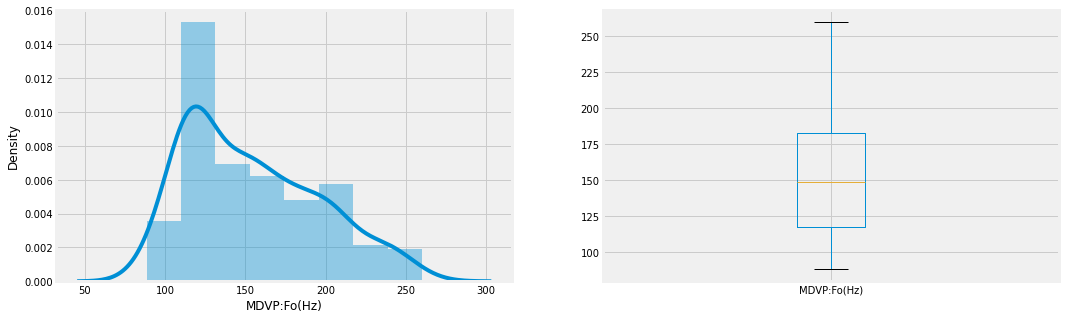

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Fo(Hz)']);
plt.subplot(122)
parkinsons['MDVP:Fo(Hz)'].plot.box(figsize=(16,5))
plt.show()

The Average vocal fundamental frequency (MDVP:Fo(Hz)) for most instances lies in the range of 120 to 180 hz.

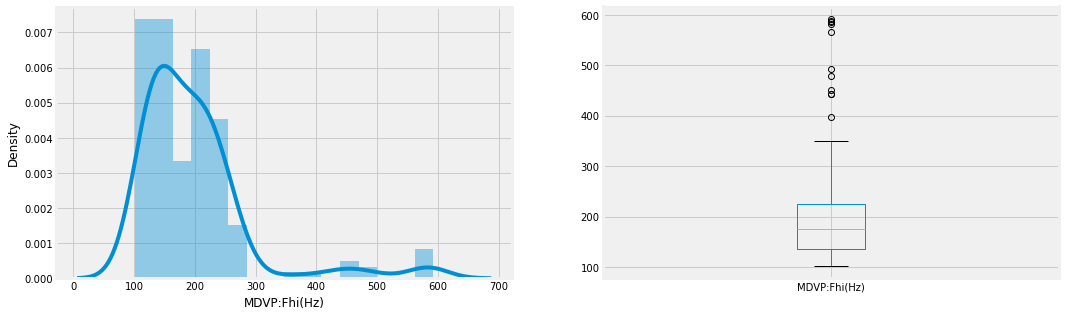

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Fhi(Hz)']);
plt.subplot(122)
parkinsons['MDVP:Fhi(Hz)'].plot.box(figsize=(16,5))
plt.show()

The Maximum vocal fundamental frequency (MDVP:Fhi(Hz)) of most instances lies in the range 130 to 230 with quite some outliers having over 400 hz upto 650 hz of Maximum vocal fundamental frequency.

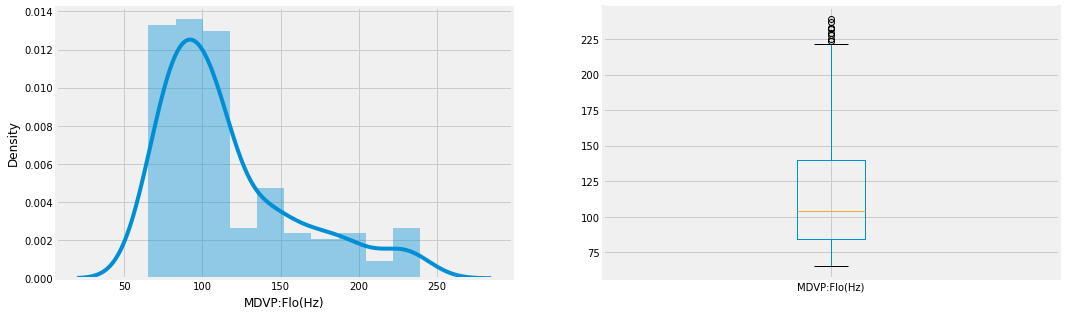

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Flo(Hz)']);
plt.subplot(122)
parkinsons['MDVP:Flo(Hz)'].plot.box(figsize=(16,5))
plt.show()

The Minimum vocal fundamental frequency (MDVP:Flo(Hz)) of most instances lies in the range 80 to 180 with quite some outliers having over 225 hz of Minimum vocal fundamental frequency.

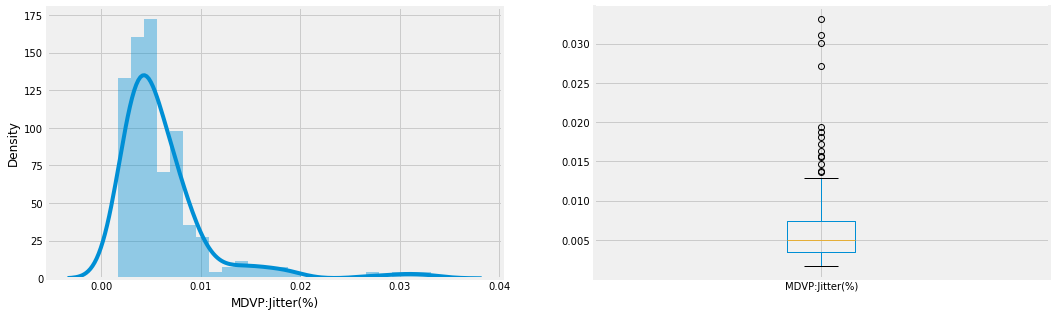

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Jitter(%)']);
plt.subplot(122)
parkinsons['MDVP:Jitter(%)'].plot.box(figsize=(16,5))
plt.show()

The MDVP:Jitter(%)values for most of the instances lies in the range 0.002 to 0.008 with some outliers from 0.013 upto 0.037 (%).

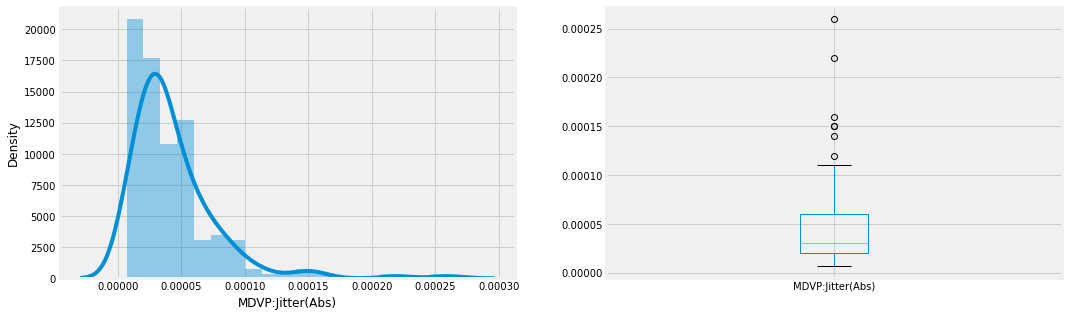

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Jitter(Abs)']);
plt.subplot(122)
parkinsons['MDVP:Jitter(Abs)'].plot.box(figsize=(16,5))
plt.show()

 The MDVP:Jitter(Abs) values for most of the instances lies in the range 0.00003 to 0.00007 with some outliers upto 0.00028.

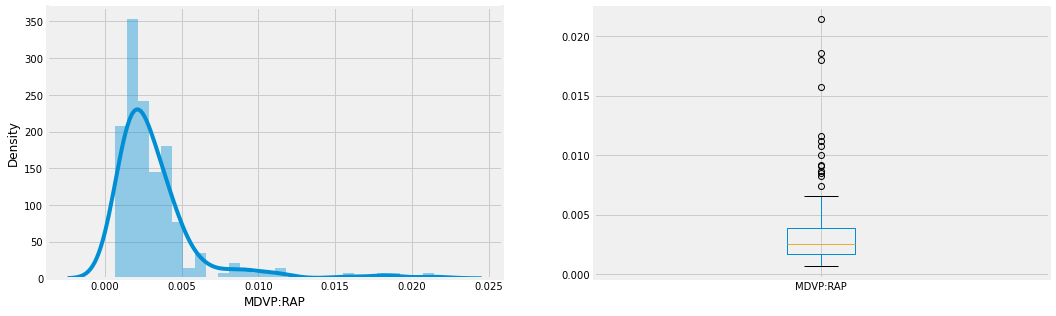

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:RAP']);
plt.subplot(122)
parkinsons['MDVP:RAP'].plot.box(figsize=(16,5))
plt.show()

 The MDVP:RAP values values for most of the instances lies in the range 0.001  to 0.005 with some outliers fro, 0.008 upto 0.025.

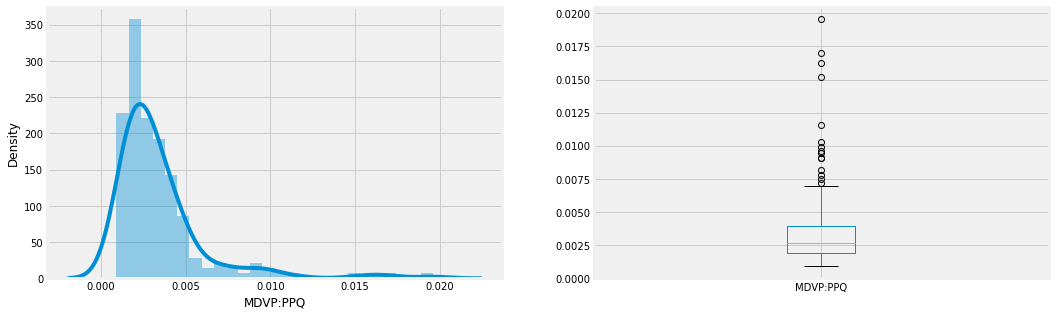

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:PPQ']);
plt.subplot(122)
parkinsons['MDVP:PPQ'].plot.box(figsize=(16,5))
plt.show()

 The MDVP:PPQ values for most instances lies in the range  0.0020 to 0.0040 with some outliers upto 0.020.

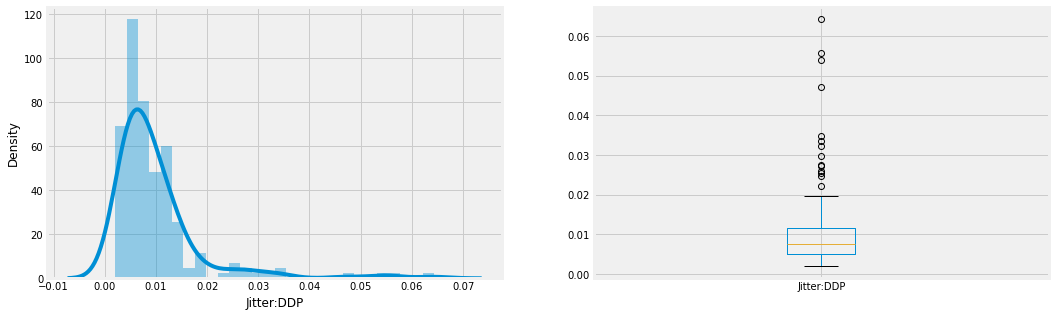

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['Jitter:DDP']);
plt.subplot(122)
parkinsons['Jitter:DDP'].plot.box(figsize=(16,5))
plt.show()

 The Jitter:DDP values for most instances lies in the range 0.005 to 0.015 with high amount of outliers from 0.02 upto 0.07.

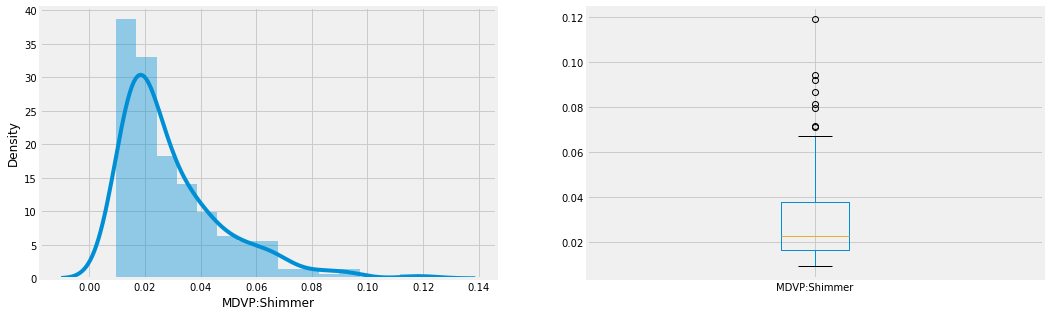

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Shimmer']);
plt.subplot(122)
parkinsons['MDVP:Shimmer'].plot.box(figsize=(16,5))
plt.show()

 The MDVP:Shimmer values for most instances lies in the range 0.005 to 0.05 with ouliers having values above 0.07 upto 0.13.

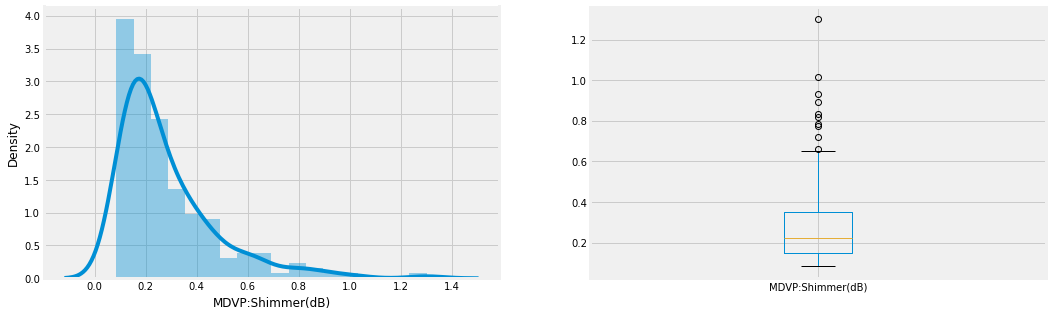

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:Shimmer(dB)']);
plt.subplot(122)
parkinsons['MDVP:Shimmer(dB)'].plot.box(figsize=(16,5))
plt.show()

The MDVP:Shimmer(dB) values for most instances lies in the range 0.05 to 0.5 with ouliers having values above 0.7 upto 1.4.

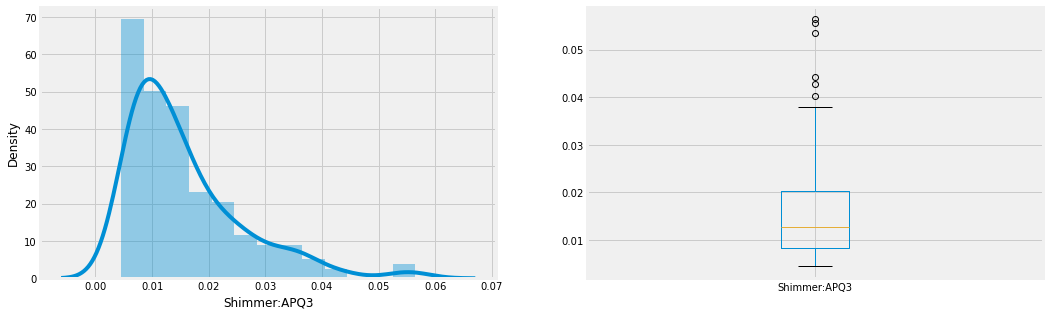

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['Shimmer:APQ3']);
plt.subplot(122)
parkinsons['Shimmer:APQ3'].plot.box(figsize=(16,5))
plt.show()

 The Shimmer:APQ3 values for most instances lies in the range 0.005 to 0.025 with ouliers having values above 0.04 upto 0.07.

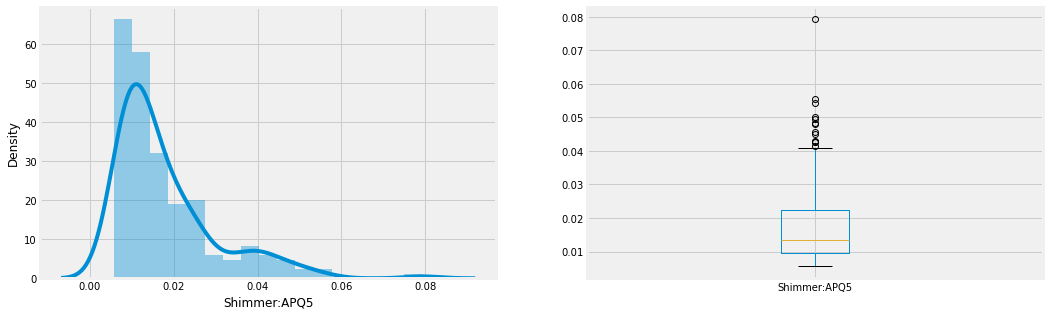

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['Shimmer:APQ5']);
plt.subplot(122)
parkinsons['Shimmer:APQ5'].plot.box(figsize=(16,5))
plt.show()

 The Shimmer:APQ5 values for most instances lies in the range 0.005 to 0.025 with ouliers having values above 0.04 upto 0.09.

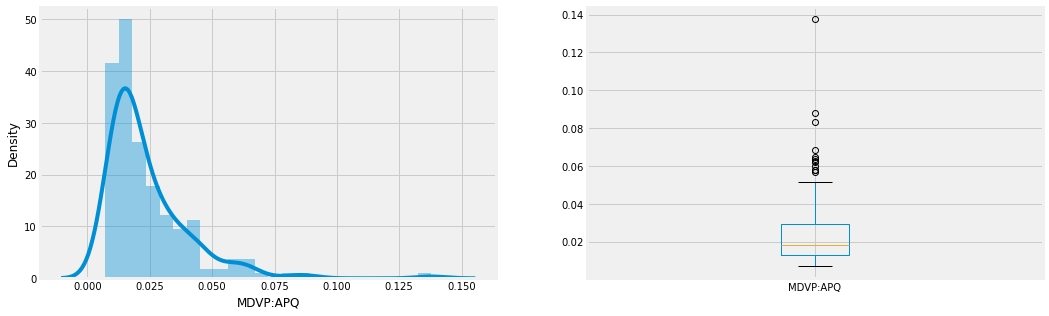

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['MDVP:APQ']);
plt.subplot(122)
parkinsons['MDVP:APQ'].plot.box(figsize=(16,5))
plt.show()

The MDVP:APQ values for most instances lies in the range 0.005 to 0.03 with ouliers having values above 0.05 upto 0.14

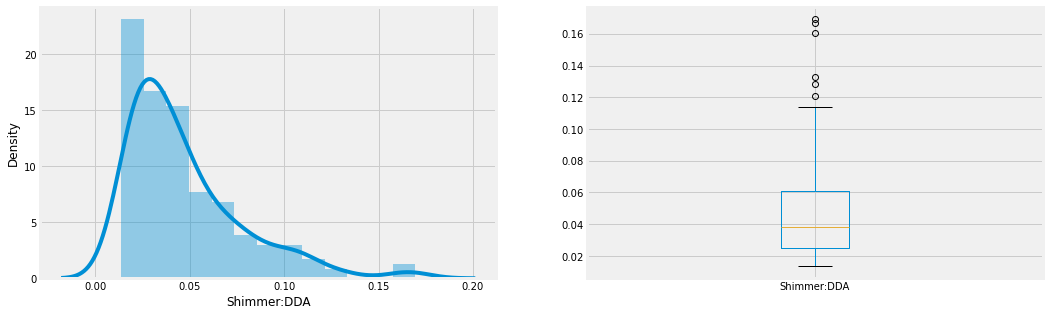

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['Shimmer:DDA']);
plt.subplot(122)
parkinsons['Shimmer:DDA'].plot.box(figsize=(16,5))
plt.show()

 The Shimmer:DDA values for most instances lies in the range 0.025 to 0.06 with ouliers having values above 0.12 upto 0.20.

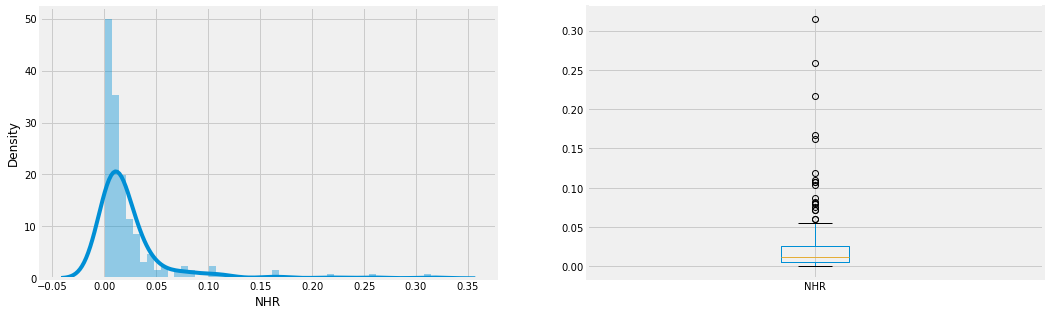

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['NHR']);
plt.subplot(122)
parkinsons['NHR'].plot.box(figsize=(16,5))
plt.show()

 The NHR values for most instances lies in the range 0.01 to 0.03 with ouliers having values above 0.06 upto 0.30.

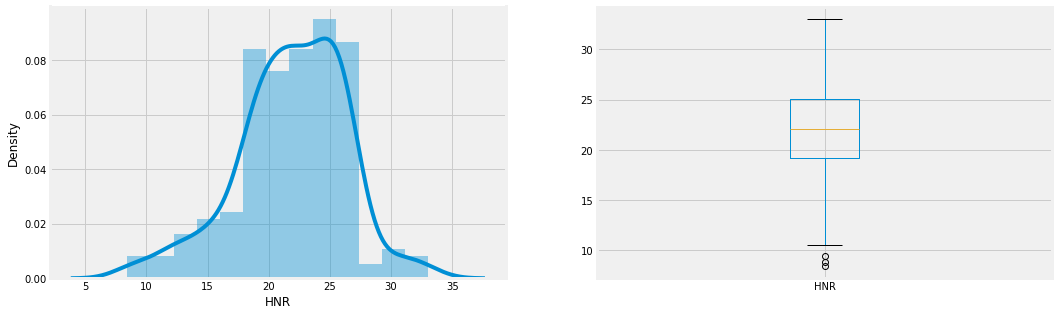

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['HNR']);
plt.subplot(122)
parkinsons['HNR'].plot.box(figsize=(16,5))
plt.show()

 The HNR values for most instances lies in the range 18 to 26 with  a few  ouliers having values below 10.

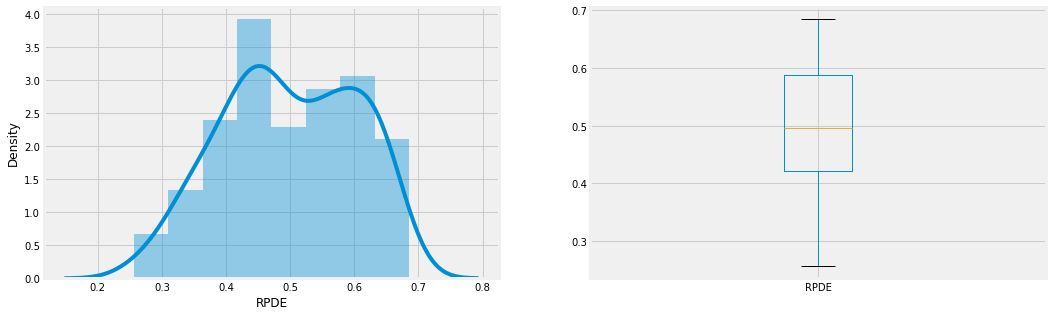

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['RPDE']);
plt.subplot(122)
parkinsons['RPDE'].plot.box(figsize=(16,5))
plt.show()

 The RPDE values for most instances lies in the range 0.35 to 0.6 with no outliers.

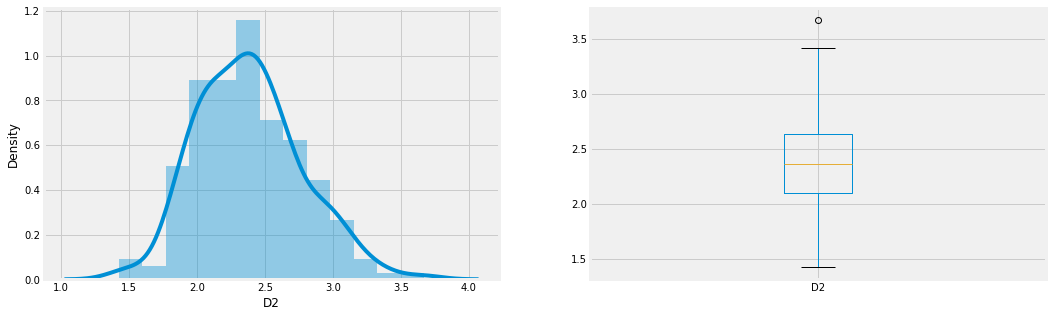

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['D2']);
plt.subplot(122)
parkinsons['D2'].plot.box(figsize=(16,5))
plt.show()

The D2 values for most instances lies in the range 2 to 3 with  outliers over 3.5.

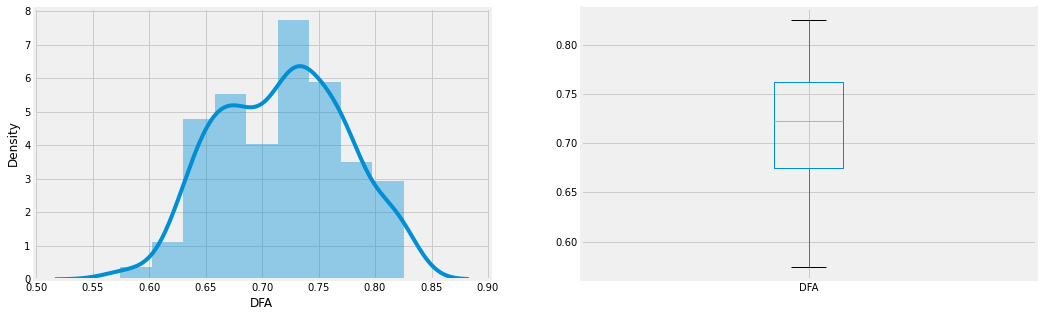

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['DFA']);
plt.subplot(122)
parkinsons['DFA'].plot.box(figsize=(16,5))
plt.show()

 The DFA values for most instances lies in the range 0.625 to 0.775 with no outliers.

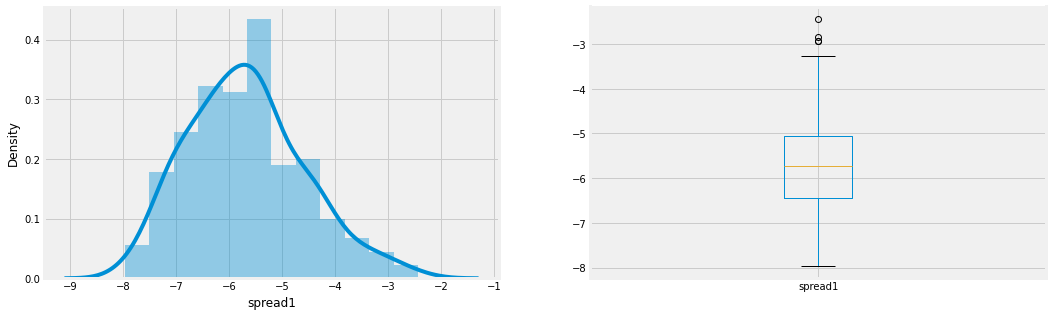

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['spread1']);

plt.subplot(122)
parkinsons['spread1'].plot.box(figsize=(16,5))

plt.show()

The spread1 values for most instances lies in the range -6.5 to -4.5 with  outliers over -3 upto -1 .

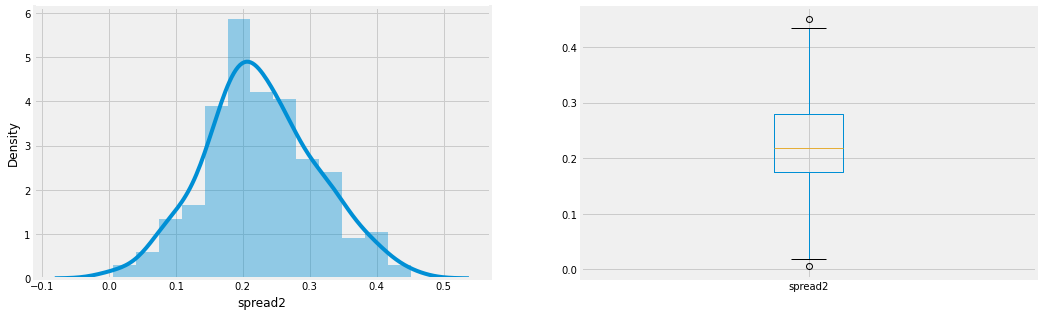

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['spread2']);

plt.subplot(122)
parkinsons['spread2'].plot.box(figsize=(16,5))

plt.show()

 The spread 2 values for most instances lies in the range 0.17 to 0.27 with outliers over 0.4 and below 0.0 

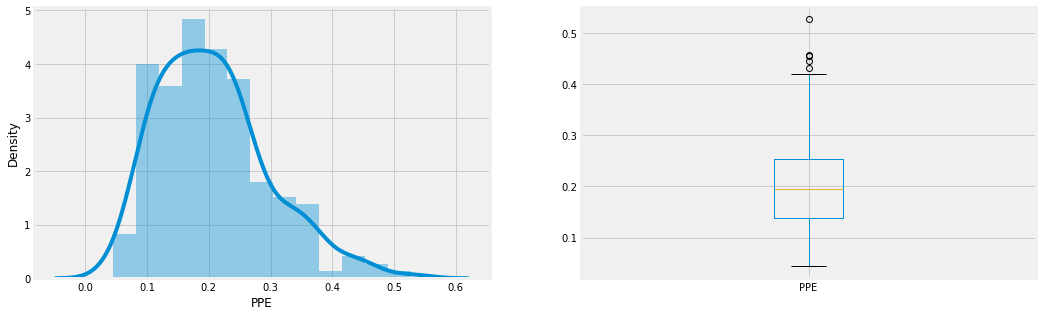

In [31]:
plt.figure(1)
plt.subplot(121)
sns.distplot(parkinsons['PPE']);

plt.subplot(122)
parkinsons['PPE'].plot.box(figsize=(16,5))

plt.show()

The PPE values for most instances lies in the range 0.15 to 0.27 with outliers over 0.4 upto 0.6

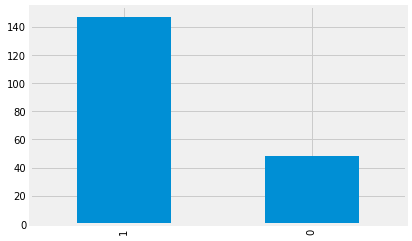

In [32]:
# the target variable
parkinsons['status'].value_counts().plot.bar()
plt.show()

In [33]:
parkinsons['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

 Out of the total instances 147 are detected with parkinsons disease and 48 are healthy.

## Bivariate Ananlysis

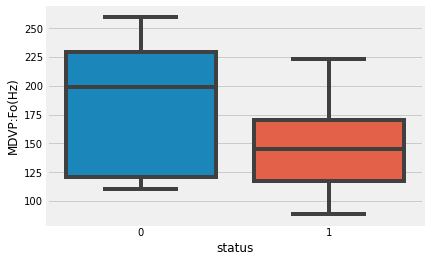

In [34]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=parkinsons)
plt.show()

 Peope with Average vocal fundamental frequency in the range 120 to 170 hz have pd  while those having above 175 are healthy

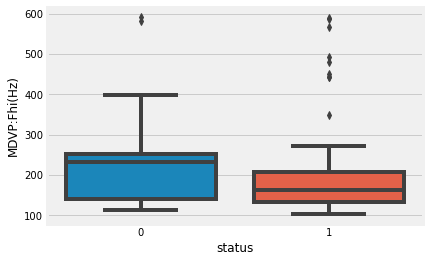

In [35]:
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=parkinsons)
plt.show()

 Peope with Maximum vocal fundamental frequency in the range 120 to 200 hz tend to have pd while those having above 200 are healthy

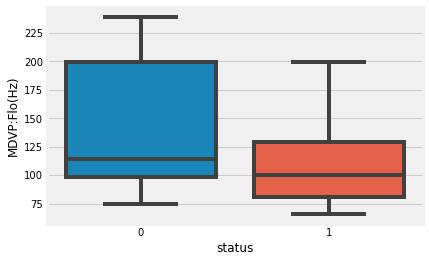

In [36]:
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=parkinsons)
plt.show()

 Peope with Minimum vocal fundamental frequency in the range 85 to 130 hz tend to have pd while those having above 140 are healthy

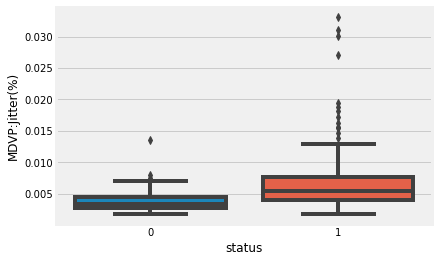

In [37]:
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=parkinsons)
plt.show()

Peope with MDVP:Jitter(%) values  in the range 0.004 to 0.008 tend to have pd while those having less than 0.003  are healthy

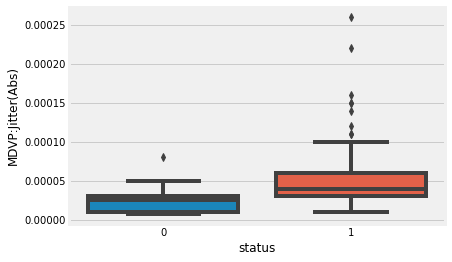

In [38]:
sns.boxplot(x='status',y='MDVP:Jitter(Abs)',data=parkinsons)
plt.show()

 Peope with MMDVP:Jitter(Abs) values  in the range 0.00003 to 0.00006 tend to have pd while those having less than 0.00002  are healthy with some outliers

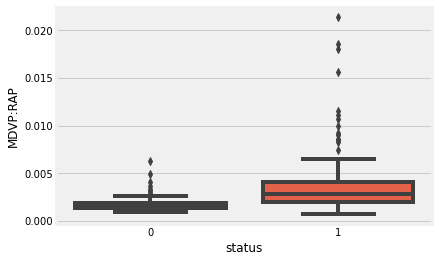

In [39]:
sns.boxplot(x='status',y='MDVP:RAP',data=parkinsons)
plt.show()

 Peope with MDVP:RAP values  in the range 0.002 to 0.004 tend to have pd while those having less than 0.002  are healthy with some outliers

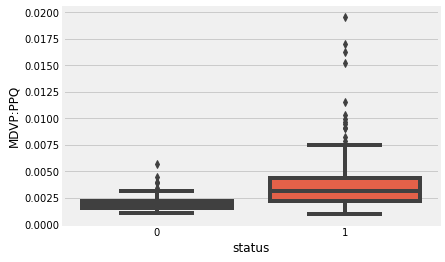

In [40]:
sns.boxplot(x='status',y='MDVP:PPQ',data=parkinsons)
plt.show()

 Peope with MDVP:PPQ  values  in the range 0.0023 to 0.0048 tend to have pd while those having less than 0.0020  are healthy with some outliers

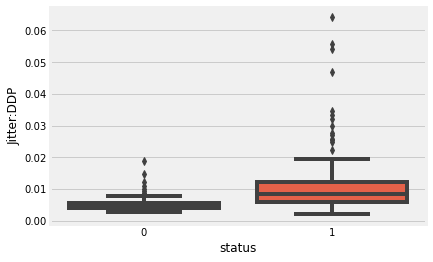

In [41]:
sns.boxplot(x='status',y='Jitter:DDP',data=parkinsons)
plt.show()

 Peope with Jitter:DDP  values  in the range 0.005 to 0.014 tend to have pd while those having less than 0.004  are healthy with some outliers

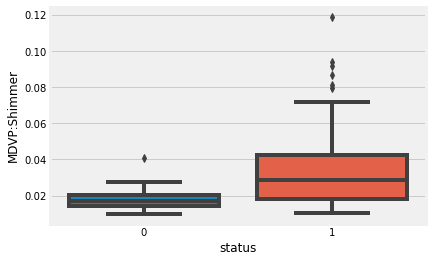

In [42]:
sns.boxplot(x='status',y='MDVP:Shimmer',data=parkinsons)
plt.show()

Peope with MDVP:Shimmer  values  in the range 0.02 to 0.045 tend to have pd while those having less than 0.02  are healthy with some outliers

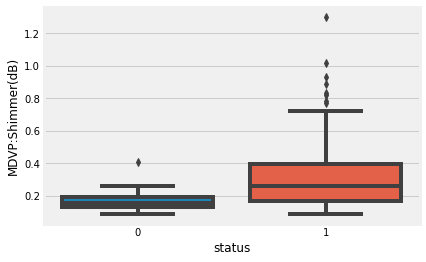

In [43]:
sns.boxplot(x='status',y='MDVP:Shimmer(dB)',data=parkinsons)
plt.show()

 Peope with MDVP:Shimmer(dB) values  in the range 0.2 to 0.4 tend to have pd while those having less than 0.2  are healthy with some outliers

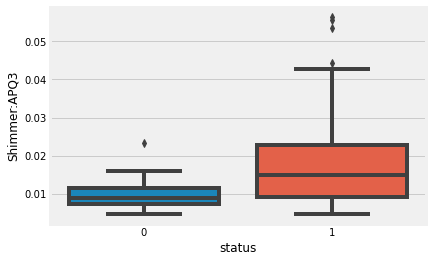

In [44]:
sns.boxplot(x='status',y='Shimmer:APQ3',data=parkinsons)
plt.show()

 Peope with Shimmer:APQ3 values  in the range 0.01 to 0.025 tend to have pd while those having less than 0.005  are healthy with some outliers

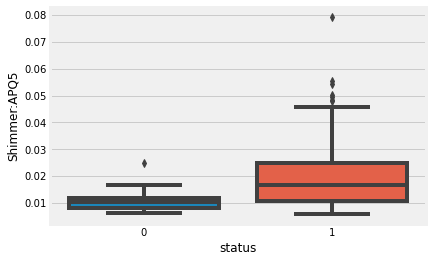

In [45]:
sns.boxplot(x='status',y='Shimmer:APQ5',data=parkinsons)
plt.show()

 Peope with Shimmer:APQ5 values  in the range 0.01 to 0.025 tend to have pd while those having less than 0.005  are healthy with some outliers

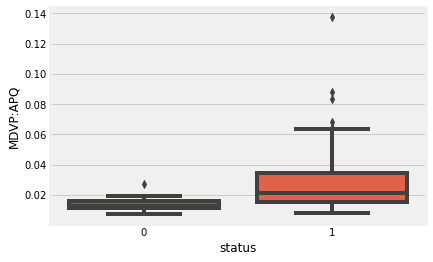

In [46]:
sns.boxplot(x='status',y='MDVP:APQ',data=parkinsons)
plt.show()

 Peope with MDVP:APQ values  in the range 0.01 to 0.035 tend to have pd while those having less than 0.01  are healthy with some outliers

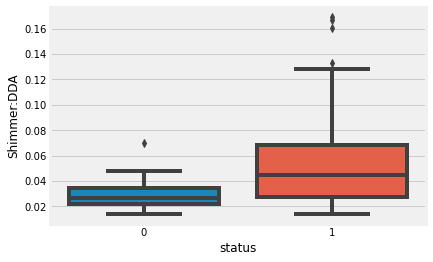

In [47]:
sns.boxplot(x='status',y='Shimmer:DDA',data=parkinsons)
plt.show()

 Peope with Shimmer:DDA  values in the range 0.025 to 0.065 tend to have pd while those having less than 0.025  are healthy with some outliers

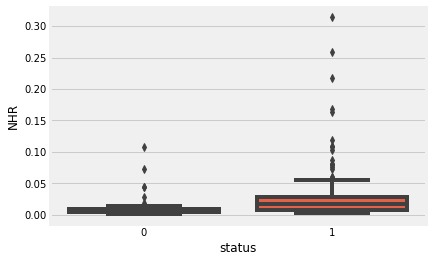

In [48]:
sns.boxplot(x='status',y='NHR',data=parkinsons)
plt.show()

 Peope with NHR values  in the range 0.02 to 0.04 tend to have pd while those having less than 0.02 are healthy with some outliers

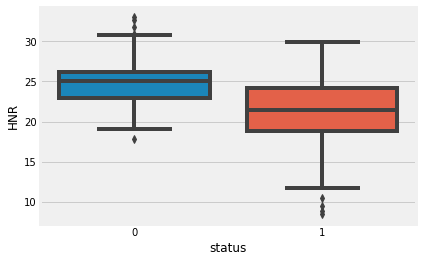

In [49]:
sns.boxplot(x='status',y='HNR',data=parkinsons)
plt.show()

 Peope with HNR values in the range 18 to 24 tend to have pd while those having more than 25 are healthy with some outliers

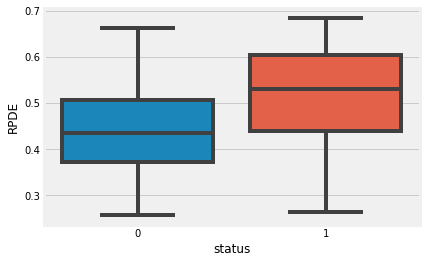

In [50]:
sns.boxplot(x='status',y='RPDE',data=parkinsons)
plt.show()

 Peope with RPDE values in the range 0.45 to 0.6 tend to have pd while those having less than 0.45  are healthy

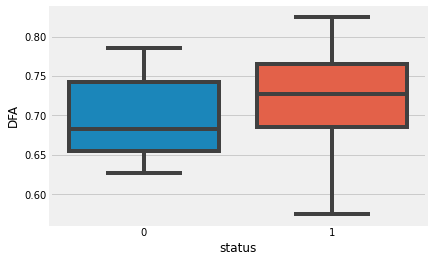

In [51]:
sns.boxplot(x='status',y='DFA',data=parkinsons)
plt.show()

 Peope with DFA values in the range 0.655 to 0.755 tend to have pd while those having less than 0.655 are healthy

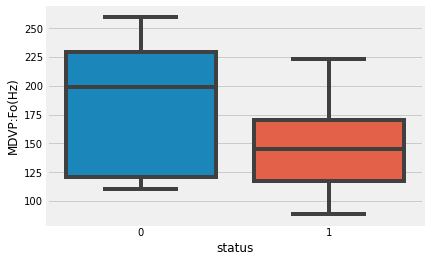

In [52]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=parkinsons)
plt.show()

 Peope with MDVP:Fo(Hz) values in the range 123 to 170 tend to have pd while those having more than 175  are healthy

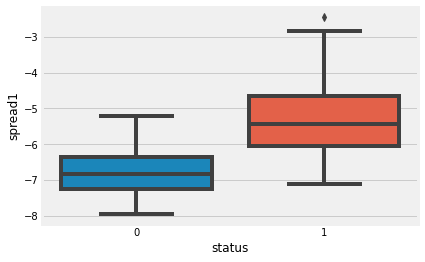

In [53]:
sns.boxplot(x='status',y='spread1',data=parkinsons)
plt.show()

 Peope with spread 1 values in the range -6 to -4.5 tend to have pd with some outliers while those having less than -6 are healthy

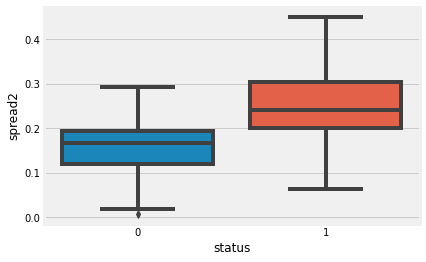

In [54]:
sns.boxplot(x='status',y='spread2',data=parkinsons)
plt.show()

 Peope with spread 2 values in the range 0.2 to 0.3 tend to have pd  while those having less than 0.2 are healthy

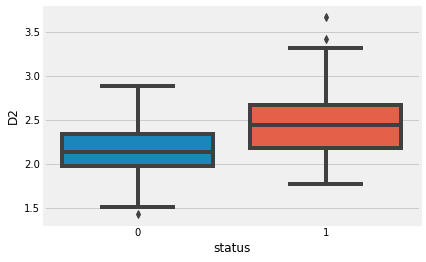

In [55]:
sns.boxplot(x='status',y='D2',data=parkinsons)
plt.show()

 Peope with D2 values in the range 2.25 to 2.75 tend to have pd with some outliers while those having less than 2.4 are healthy with some outliers

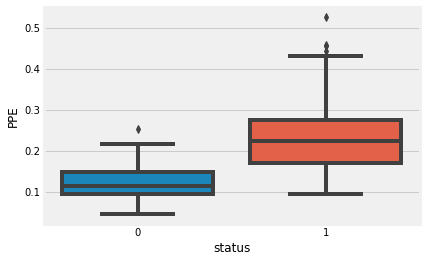

In [56]:
sns.boxplot(x='status',y='PPE',data=parkinsons)
plt.show()

 Peope with PPE values in the range 0.17 to 0.27 tend to have pd with some outliers while those having less than 0.15 are healthy with some outliers

## Multivariate Analysis

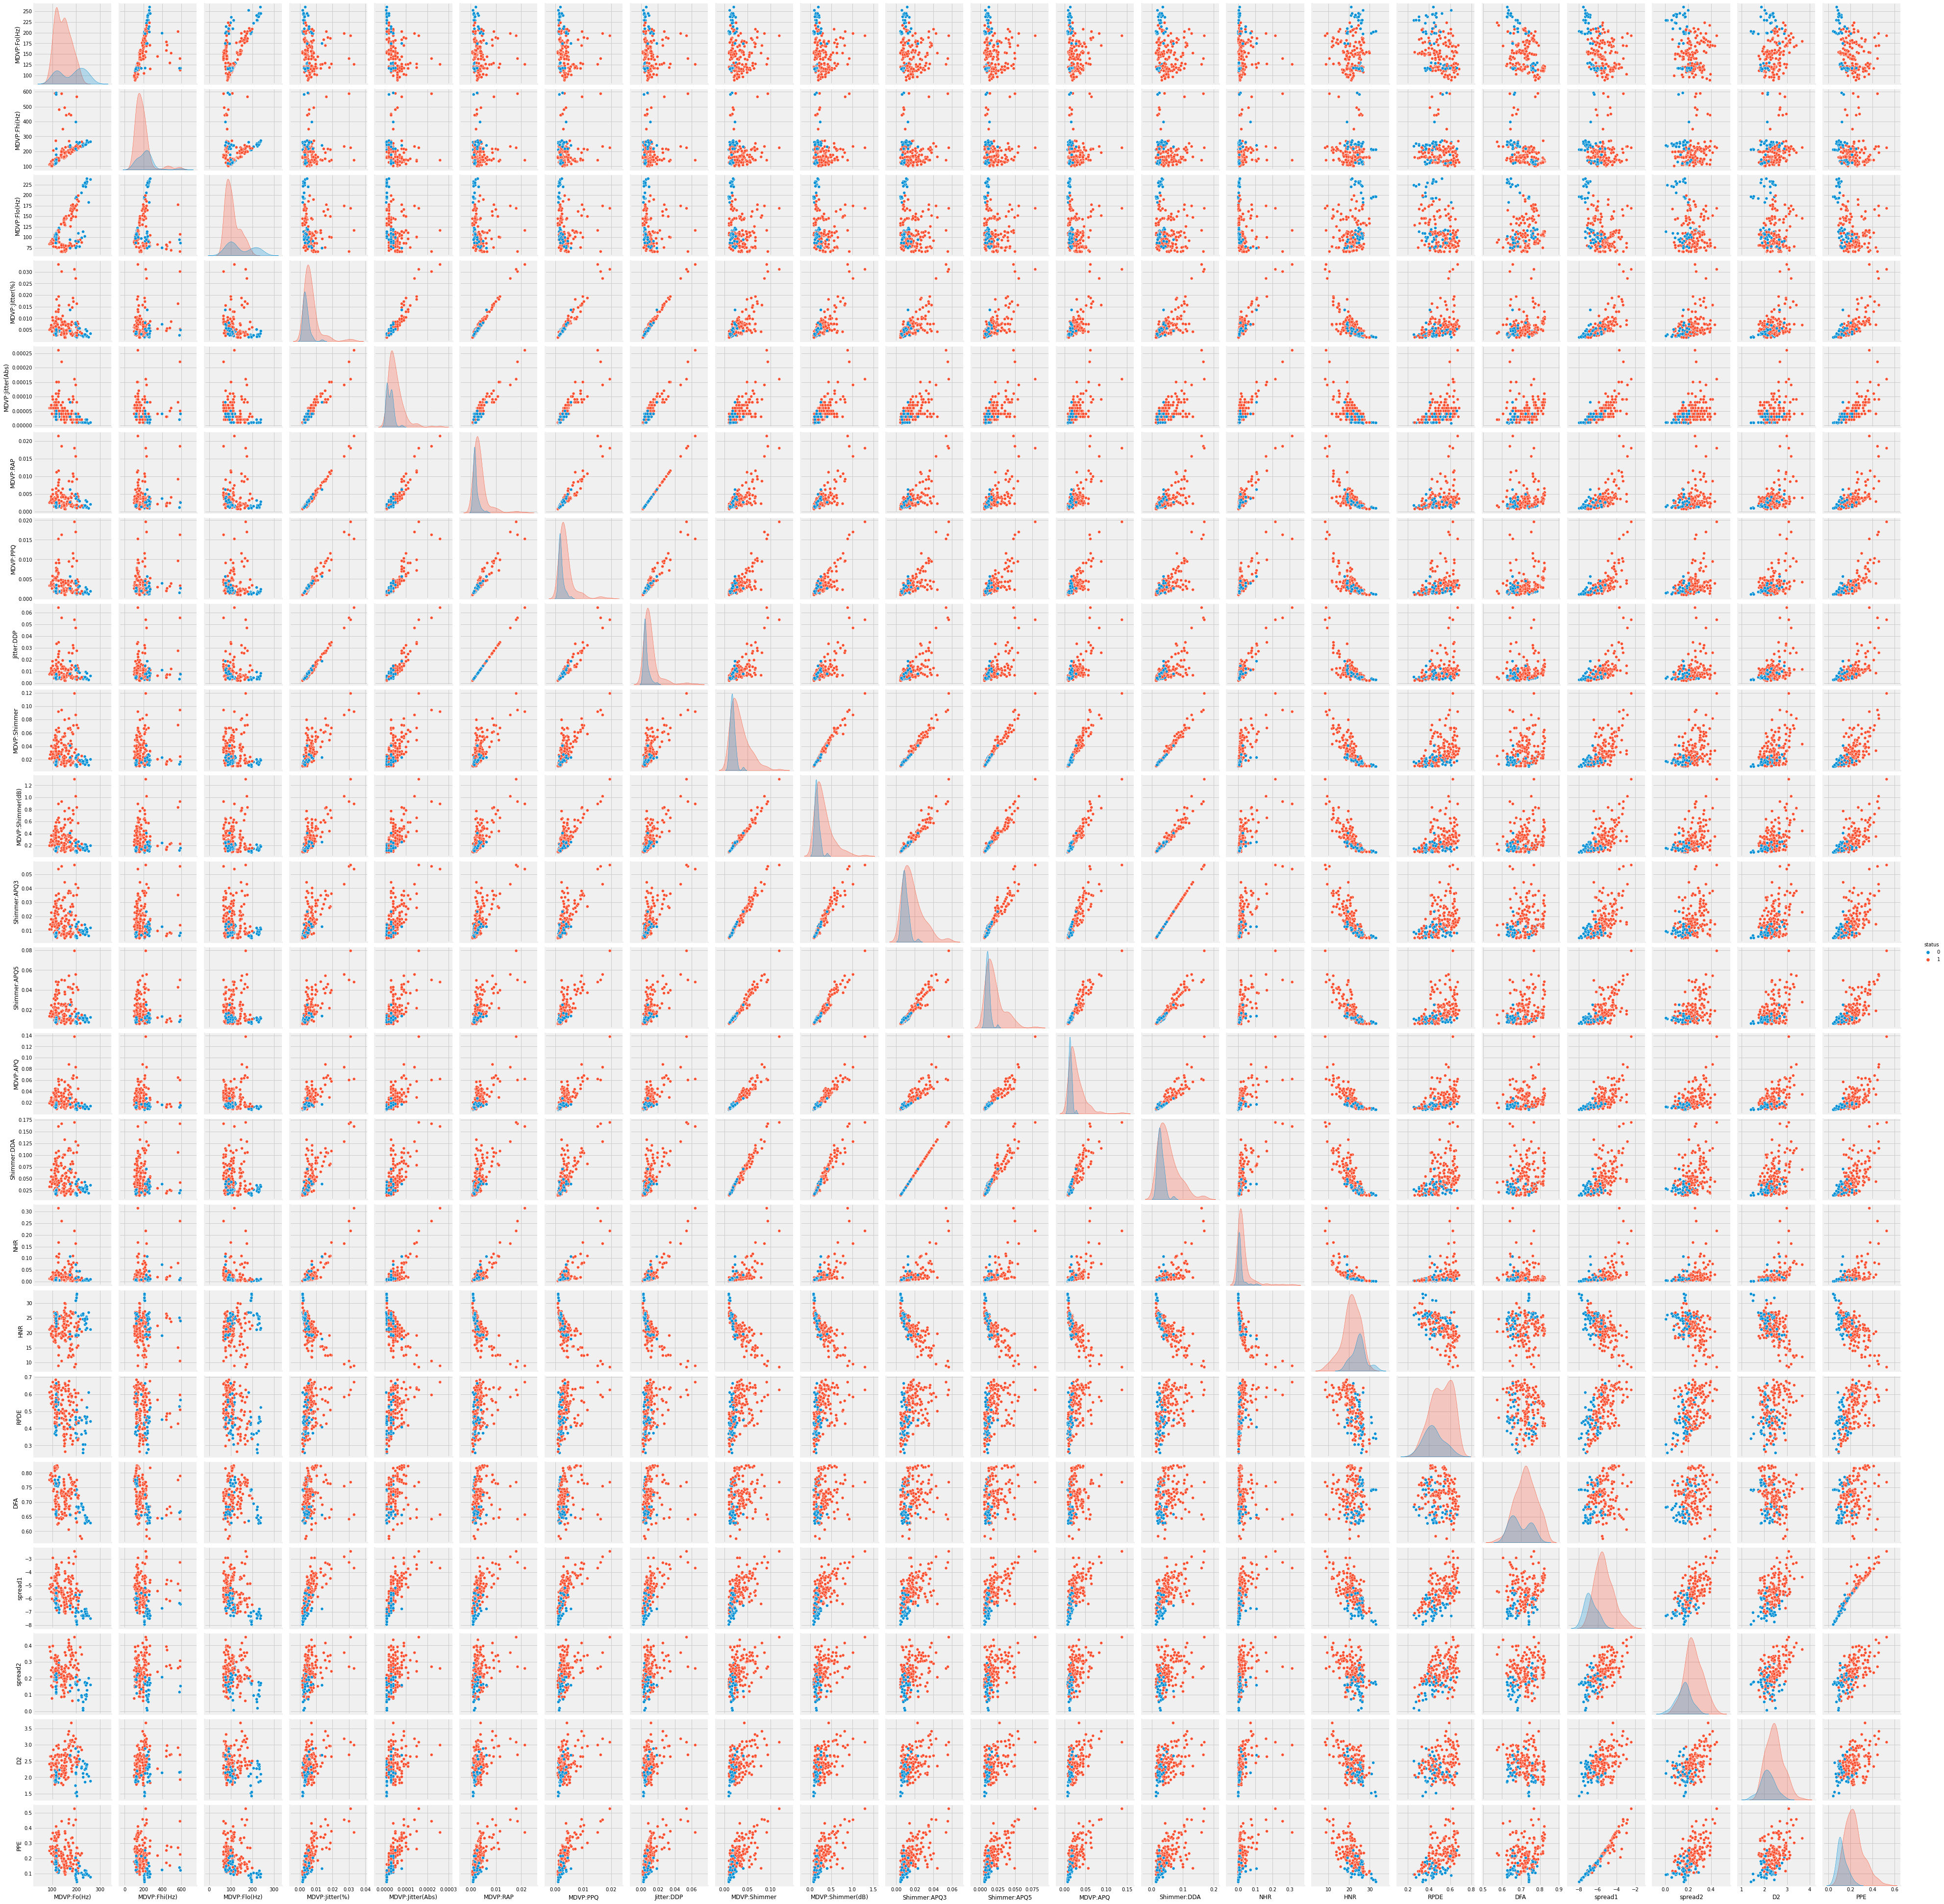

In [57]:
sns.pairplot(parkinsons, hue = 'status')
plt.show()

In [58]:
parkinsons.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

It is evident  that columns MDVP:Fo(Hz) , MDVP:Fhi(Hz) , MDVP:Flo(Hz) and hnr having negative correlation with status while spread1, spread2 and PPE are positively and more correlated with our target column status, when compared to the other columns.

## Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [59]:
X=parkinsons.drop('status', axis=1)
y=parkinsons['status']

In [60]:
X=X.drop('name',axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [62]:
dm=DecisionTreeClassifier(criterion = 'entropy')

In [63]:
dm.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. 

In [64]:
y_pred= dm.predict(X_test)

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


In [66]:
print(metrics.confusion_matrix(y_test, y_pred))

[[10  5]
 [ 3 41]]


In [67]:
print("The predicted values are: \n", y_pred)
print("\nCrosstab:\n", pd.crosstab(y_test, y_pred, margins=True))

The predicted values are: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0]

Crosstab:
 col_0    0   1  All
status             
0       10   5   15
1        3  41   44
All     13  46   59


##  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?  

In [68]:
max_depth_parameter = np.arange(1,21)
min_sample_leaf_parameter = np.arange(1,21)
for k in max_depth_parameter:
    for l in min_sample_leaf_parameter:
        print("max_depth_parameter",k)
        model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = k, min_samples_leaf = l)
        model2.fit(X_train, y_train)
        Y_predict2 = model2.predict(X_test)
        print("min_sample_leaf_parameter",l,"The Accuracy Score:", accuracy_score(y_test, Y_predict2))
    print("\n")   

max_depth_parameter 1
min_sample_leaf_parameter 1 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 2 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 3 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 4 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 5 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 6 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 7 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 8 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 9 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 10 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_sample_leaf_parameter 11 The Accuracy Score: 0.864406779661017
max_depth_parameter 1
min_samp

min_sample_leaf_parameter 1 The Accuracy Score: 0.864406779661017
max_depth_parameter 6
min_sample_leaf_parameter 2 The Accuracy Score: 0.8983050847457628
max_depth_parameter 6
min_sample_leaf_parameter 3 The Accuracy Score: 0.847457627118644
max_depth_parameter 6
min_sample_leaf_parameter 4 The Accuracy Score: 0.8813559322033898
max_depth_parameter 6
min_sample_leaf_parameter 5 The Accuracy Score: 0.8983050847457628
max_depth_parameter 6
min_sample_leaf_parameter 6 The Accuracy Score: 0.864406779661017
max_depth_parameter 6
min_sample_leaf_parameter 7 The Accuracy Score: 0.864406779661017
max_depth_parameter 6
min_sample_leaf_parameter 8 The Accuracy Score: 0.8983050847457628
max_depth_parameter 6
min_sample_leaf_parameter 9 The Accuracy Score: 0.8813559322033898
max_depth_parameter 6
min_sample_leaf_parameter 10 The Accuracy Score: 0.864406779661017
max_depth_parameter 6
min_sample_leaf_parameter 11 The Accuracy Score: 0.864406779661017
max_depth_parameter 6
min_sample_leaf_parameter

min_sample_leaf_parameter 3 The Accuracy Score: 0.847457627118644
max_depth_parameter 11
min_sample_leaf_parameter 4 The Accuracy Score: 0.8813559322033898
max_depth_parameter 11
min_sample_leaf_parameter 5 The Accuracy Score: 0.8813559322033898
max_depth_parameter 11
min_sample_leaf_parameter 6 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_leaf_parameter 7 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_leaf_parameter 8 The Accuracy Score: 0.8983050847457628
max_depth_parameter 11
min_sample_leaf_parameter 9 The Accuracy Score: 0.8813559322033898
max_depth_parameter 11
min_sample_leaf_parameter 10 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_leaf_parameter 11 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_leaf_parameter 12 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_leaf_parameter 13 The Accuracy Score: 0.864406779661017
max_depth_parameter 11
min_sample_le

min_sample_leaf_parameter 6 The Accuracy Score: 0.8813559322033898
max_depth_parameter 16
min_sample_leaf_parameter 7 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 8 The Accuracy Score: 0.8983050847457628
max_depth_parameter 16
min_sample_leaf_parameter 9 The Accuracy Score: 0.8813559322033898
max_depth_parameter 16
min_sample_leaf_parameter 10 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 11 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 12 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 13 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 14 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 15 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_leaf_parameter 16 The Accuracy Score: 0.864406779661017
max_depth_parameter 16
min_sample_

From the above analysis, max_depth value= 6 and min_sample_leaf value = 2 gives The Accuracy Score: 0.9152542372881356 which is better than the accuracy ie 0.864406779661017 achieved before.
There is some impact on the accuracy of the model due to regularization of paameters. It has increased by increasing the max_depth factor.Regularization is done to prevent the overfitting of the data. It can make our model more accurate, which will lead to more accurate predictions overall.However, it may not always be worth our while as sometimes, there is no impact at all

From the above analysis, max_depth value= 6 and min_sample_leaf value = 2 gives The Accuracy Score: 0.9152542372881356 which is better than the accuracy ie 0.864406779661017 achieved before.
There is some impact on the accuracy of the model due to regularization of paameters. It has increased by increasing the max_depth factor.Regularization is done to prevent the overfitting of the data. It can make our model more accurate, which will lead to more accurate predictions overall.However, it may not always be worth our while as sometimes, there is no impact at all

 As individual trees are prone to overfitting, but this can be alleviated by regularizing the trees in random forest model.

## Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [69]:
acc_scores=[]
optimal_trees=np.arange(10,400)
for i in optimal_trees:
    model=RandomForestClassifier(n_jobs=2,n_estimators=i,criterion="entropy",random_state=143)
    model.fit(X_train,y_train)
    y_pred_rf=model.predict(X_test)
    rf_score=metrics.accuracy_score(y_test, y_pred_rf)
    acc_scores.append(rf_score)

In [70]:
acc_scores

[0.9152542372881356,
 0.9322033898305084,
 0.9322033898305084,
 0.9322033898305084,
 0.9322033898305084,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.8983050847457628,
 0.8983050847457628,
 0.8983050847457628,
 0.8983050847457628,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8813559322033898,
 0.8983050847457628,
 0.9152542372881356,
 0.9152542372881356,
 0.8983050847457628,
 0.8983050847457628,
 0.8983050847457628,
 0.8983050847457628,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9491525423728814,
 0.9152542372881356,
 0.8983050847457628,
 0.8983050847457628,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372881356,
 0.9152542372

In [71]:
max(acc_scores)

0.9491525423728814

In [72]:
acc_scores.index(0.9322033898305084)

1

Text(0, 0.5, 'Accuracy')

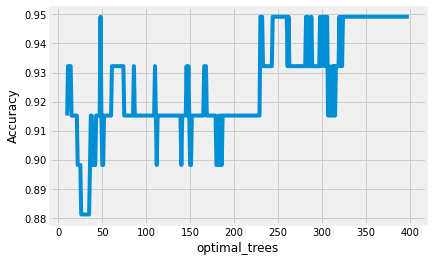

In [73]:
plt.plot(optimal_trees, acc_scores)
plt.xlabel('optimal_trees')
plt.ylabel('Accuracy')

 The optimal number of trees that gives the best result is 30 .(as the loop starts from 10 to 400 and index value achieved is 19 so 10+19+1(because index starts from 0))